In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('onlinefoods.csv')

In [2]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback', 'Unnamed: 12'],
      dtype='object')

In [3]:
# Check and remove exact duplicate rows
duplicates_found = df.duplicated().sum()
if duplicates_found > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {duplicates_found} exact duplicate rows.")

# Drop irrelevant columns
df.drop(['latitude', 'longitude', 'Unnamed: 12'], axis=1, inplace=True)
print("Removed 'latitude', 'longitude', and 'Unnamed: 12' columns.")


Removed 103 exact duplicate rows.
Removed 'latitude', 'longitude', and 'Unnamed: 12' columns.


In [4]:
# Count the occurrences of each unique value in the 'Monthly Income' column
print(df['Monthly Income'].value_counts(dropna=False))

Monthly Income
No Income          131
25001 to 50000      52
More than 50000     47
10001 to 25000      36
Below Rs.10000      19
Name: count, dtype: int64


In [5]:
# --- Clean the 'Monthly Income' column ---

# 1. Replace specific text values with numbers.
df['Monthly Income'] = df['Monthly Income'].replace('No Income', 0)
df['Monthly Income'] = df['Monthly Income'].replace('More than 50000', 50001)
df['Monthly Income'] = df['Monthly Income'].replace('Below Rs.10000', 9999)

# 2. Handle income ranges by calculating the midpoint.
#    First, identify rows with ranges (containing ' to ').
#    We use .astype(str) to ensure we can use the .str accessor.
income_ranges = df['Monthly Income'].astype(str).str.contains(' to ', na=False)

#    For those rows, split the string, remove 'Rs.', convert to numeric,
#    calculate the mean, and assign it back to the DataFrame.
df.loc[income_ranges, 'Monthly Income'] = (
    df.loc[income_ranges, 'Monthly Income']
    .astype(str)
    .str.replace('Rs.', '', regex=False)
    .str.split(' to ', expand=True)
    .astype(float)
    .mean(axis=1)
)

# 3. Convert the entire column to a numeric type.
#    The `errors='coerce'` parameter will convert any remaining non-numeric values to NaN.
df['Monthly Income'] = pd.to_numeric(df['Monthly Income'], errors='coerce')

# 4. Fill any remaining NaN values with the median of the column.
#    We are also fixing the `FutureWarning` here.
median_income = df['Monthly Income'].median()
df['Monthly Income'] = df['Monthly Income'].fillna(median_income)

# 5. Confirm there are no more NaN values in the column.
print(f"Number of NaN values in 'Monthly Income': {df['Monthly Income'].isnull().sum()}")

Number of NaN values in 'Monthly Income': 0


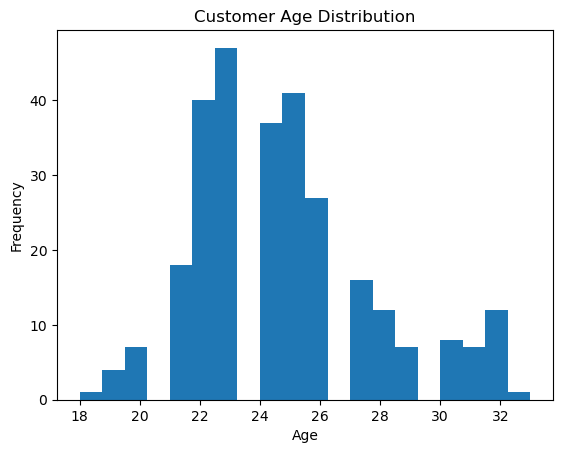

In [6]:
# --- QUESTION 1: Age Distribution ---
# Create a histogram to visualize the age distribution
df['Age'].plot(kind='hist', bins=20, title='Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [7]:
# --- QUESTION 2: Average Income by Education ---
# Group the DataFrame by 'Educational Qualifications' and calculate the mean of 'Monthly Income'
average_income_by_education = df.groupby('Educational Qualifications')['Monthly Income'].mean()
print("Average Income by Educational Qualification:")
print(average_income_by_education)

Average Income by Educational Qualification:
Educational Qualifications
Graduate         18452.650794
Ph.D             34524.380952
Post Graduate    14380.164000
School           20227.681818
Uneducated       25000.500000
Name: Monthly Income, dtype: float64


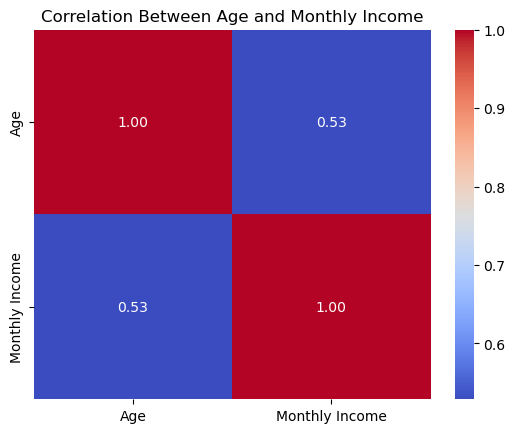

In [8]:
# Calculate the correlation matrix between 'Age' and 'Monthly Income'
correlation_matrix = df[['Age', 'Monthly Income']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Age and Monthly Income')
plt.show()

In [9]:
# Count the number of customers by gender
gender_counts = df['Gender'].value_counts()
print("Customer Count by Gender:")
print(gender_counts)
print("\n" + "-"*30 + "\n")

# Calculate the average monthly income by gender
average_income_by_gender = df.groupby('Gender')['Monthly Income'].mean()
print("Average Monthly Income by Gender:")
print(average_income_by_gender)

occupation_count = df['Occupation'].value_counts()
print(occupation_count)

Customer Count by Gender:
Gender
Male      164
Female    121
Name: count, dtype: int64

------------------------------

Average Monthly Income by Gender:
Gender
Female    16115.917355
Male      19329.548780
Name: Monthly Income, dtype: float64
Occupation
Student           144
Employee           94
Self Employeed     38
House wife          9
Name: count, dtype: int64


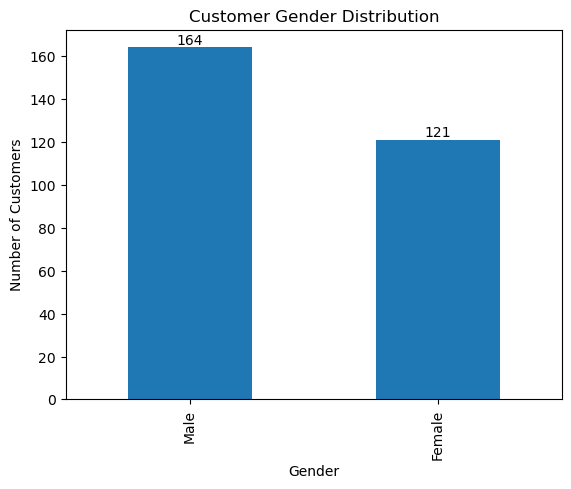

In [10]:
# Create a bar chart for Gender distribution
ax = df['Gender'].value_counts().plot(kind='bar', title='Customer Gender Distribution')

# Add the data labels on top of each bar
ax.bar_label(ax.containers[0])

# Set the labels for the X and Y axes
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

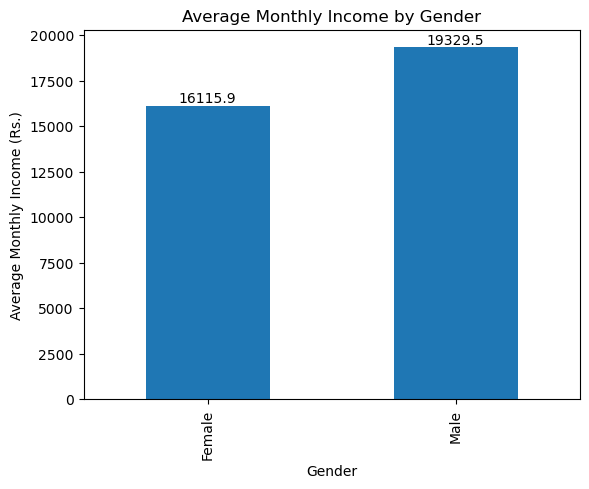

In [11]:
# Create a bar chart for average income by gender
average_income_by_gender = df.groupby('Gender')['Monthly Income'].mean()
ax = average_income_by_gender.plot(kind='bar', title='Average Monthly Income by Gender')
ax.bar_label(ax.containers[0])

plt.xlabel('Gender')
plt.ylabel('Average Monthly Income (Rs.)')
plt.show()

In [12]:
# Count the number of customers by marital status
marital_counts = df['Marital Status'].value_counts()
print("Customer Count by Marital Status:")
print(marital_counts)
print("\n" + "-"*30 + "\n")

# Calculate the average monthly income by marital status
average_income_by_marital = df.groupby('Marital Status')['Monthly Income'].mean()
print("Average Monthly Income by Marital Status:")
print(average_income_by_marital)

Customer Count by Marital Status:
Marital Status
Single               189
Married               87
Prefer not to say      9
Name: count, dtype: int64

------------------------------

Average Monthly Income by Marital Status:
Marital Status
Married              34454.614943
Prefer not to say    28611.500000
Single                9867.814815
Name: Monthly Income, dtype: float64


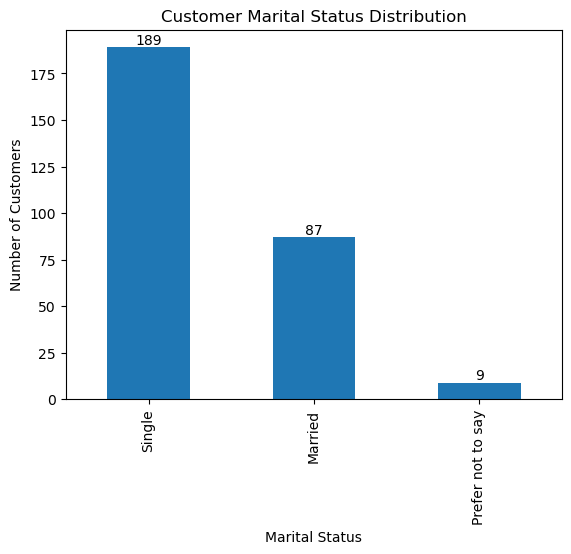

In [13]:
# Create a bar chart for Marital Status distribution with data labels
ax = df['Marital Status'].value_counts().plot(kind='bar', title='Customer Marital Status Distribution')
ax.bar_label(ax.containers[0])

plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

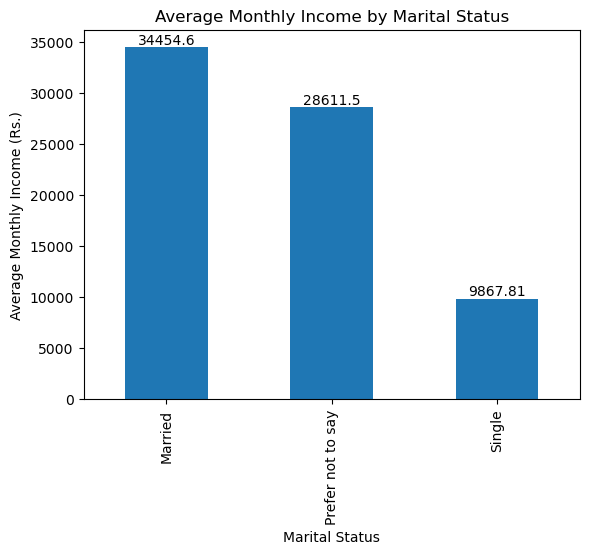

In [14]:
# Create a bar chart for average income by marital status
average_income_by_marital = df.groupby('Marital Status')['Monthly Income'].mean()
ax = average_income_by_marital.plot(kind='bar', title='Average Monthly Income by Marital Status')
ax.bar_label(ax.containers[0])

plt.xlabel('Marital Status')
plt.ylabel('Average Monthly Income (Rs.)')
plt.show()

In [15]:
# Calculate the average family size for each marital status
family_size_by_marital_status = df.groupby('Marital Status')['Family size'].mean()
print("Average Family Size by Marital Status:")
print(family_size_by_marital_status)

Average Family Size by Marital Status:
Marital Status
Married              3.781609
Prefer not to say    2.888889
Single               3.052910
Name: Family size, dtype: float64


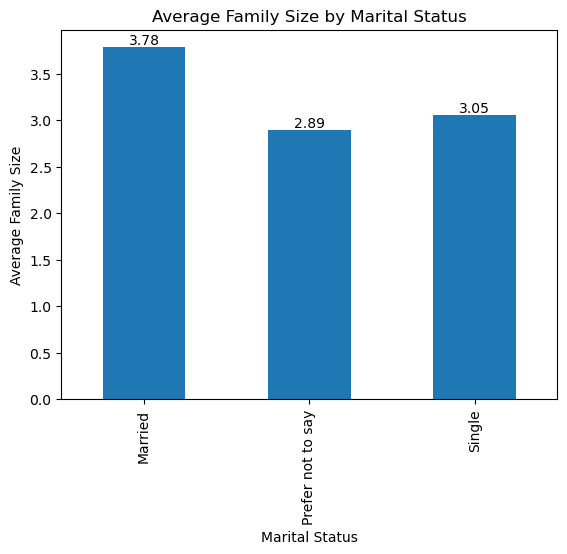

In [16]:
# Create a bar chart for average family size by marital status with data labels
family_size_by_marital_status = df.groupby('Marital Status')['Family size'].mean()
ax = family_size_by_marital_status.plot(kind='bar', title='Average Family Size by Marital Status')
ax.bar_label(ax.containers[0], fmt='%.2f')

plt.xlabel('Marital Status')
plt.ylabel('Average Family Size')
plt.show()

In [17]:
# Calculate the average monthly income for each occupation
income_by_occupation = df.groupby('Occupation')['Monthly Income'].mean()
print("Average Monthly Income by Occupation:")
print(income_by_occupation)

Average Monthly Income by Occupation:
Occupation
Employee          35133.537234
House wife            0.000000
Self Employeed    37829.671053
Student            2638.833333
Name: Monthly Income, dtype: float64


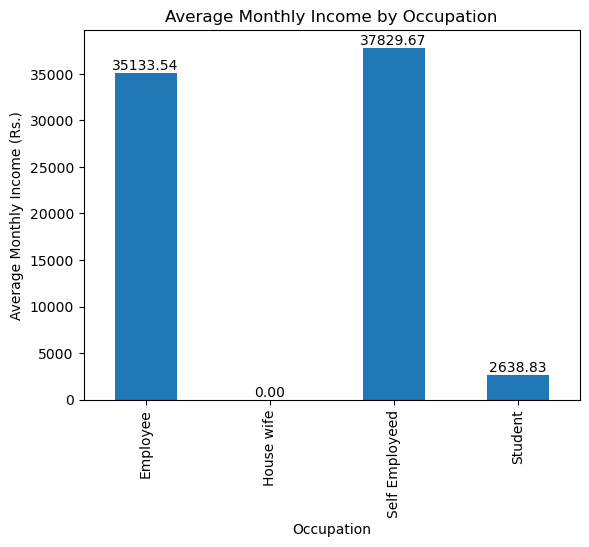

In [18]:
# Create a bar chart for average income by occupation with data labels
income_by_occupation = df.groupby('Occupation')['Monthly Income'].mean()
ax = income_by_occupation.plot(kind='bar', title='Average Monthly Income by Occupation')
ax.bar_label(ax.containers[0], fmt='%.2f')

plt.xlabel('Occupation')
plt.ylabel('Average Monthly Income (Rs.)')
plt.show()

In [19]:
df['Feedback'].value_counts()

Feedback
Positive     231
Negative      54
Name: count, dtype: int64

In [20]:
df['Output'].value_counts()


Output
Yes    217
No      68
Name: count, dtype: int64

In [21]:
# Calculate the average monthly income for each feedback category
average_income_by_feedback = df.groupby('Feedback')['Monthly Income'].mean()
print("Average Monthly Income by Feedback:")
print(average_income_by_feedback)

Average Monthly Income by Feedback:
Feedback
Negative     23472.490741
Positive     16677.738095
Name: Monthly Income, dtype: float64


In [22]:
df.to_csv('cleaned_customer_data.csv', index=False)